In [5]:
from IPython.display import Image
from IPython.display import display
import os
try:
    __IPYTHON__
    from tqdm.notebook import tqdm
except NameError:
    from tqdm import tqdm

In [ ]:
# !conda install -n TCSfromDMRS -c conda-forge jupyterlab_widgets
# !conda install -n TCSfromDMRS -c conda-forge ipywidgets

In [1]:
ww1212tar_dir = "1212"
targ_export_dir = "exports"
targ_data_dir = "data/29092022"
erg_dir = "erg"


# Preprocessing

## Extract exports

In [ ]:
# untar the export files to exports, e.g. 1212/export0.tar to exports/export0
# extract_exports.main(ww1212tar_dir, targ_export_dir)
!python extract_exports.py \
    --ww1212_dir 1212 \
    --targ_export_dir exports

## Save DMRS to json

In [ ]:
# warnings.filterwarnings("ignore")
# args ='--targ_export_dir {} --targ_data_dir {} --erg_dir {} --save_deriv {} --sample_only {} --verbose {}'.format(
#     targ_export_dir, targ_data_dir, erg_dir, "no", "no", "no")
# !python src/preprocess.py {args} >& preprocess_log.txt &
!python preprocess.py \
    --targ_export_dir exports \
    --targ_data_dir data/27092022 \
    --erg_dir erg --save_deriv no \
    --sample_only no \
    --verbose no


## Generate Transform Config

In [3]:
# logic_pred_anno_path = "erg/logical_preds.txt"
# trsfm_config_path = "transform/configs/config_12092022.json"
# args ='--logic_pred_anno_path {} --trsfm_config_path {}'.format(
#     logic_pred_anno_path, trsfm_config_path
# )
# !python generate_trsfm_config.py {args}
!python generate_trsfm_config.py \
    --logic_pred_anno_path erg/logical_preds.txt \
    --trsfm_config_path transform/configs/config.json

## Generate Dummy Data

NOTE: parsed 1 / 1 sentences, avg 15420k, time 0.11723s
dmrs drawn: ./data/dummy_data/figures/dmrs_0.png
NOTE: parsed 1 / 1 sentences, avg 4083k, time 0.03133s
dmrs drawn: ./data/dummy_data/figures/dmrs_1.png
['./data/dummy_data/figures/dmrs_0.png', './data/dummy_data/figures/dmrs_1.png']


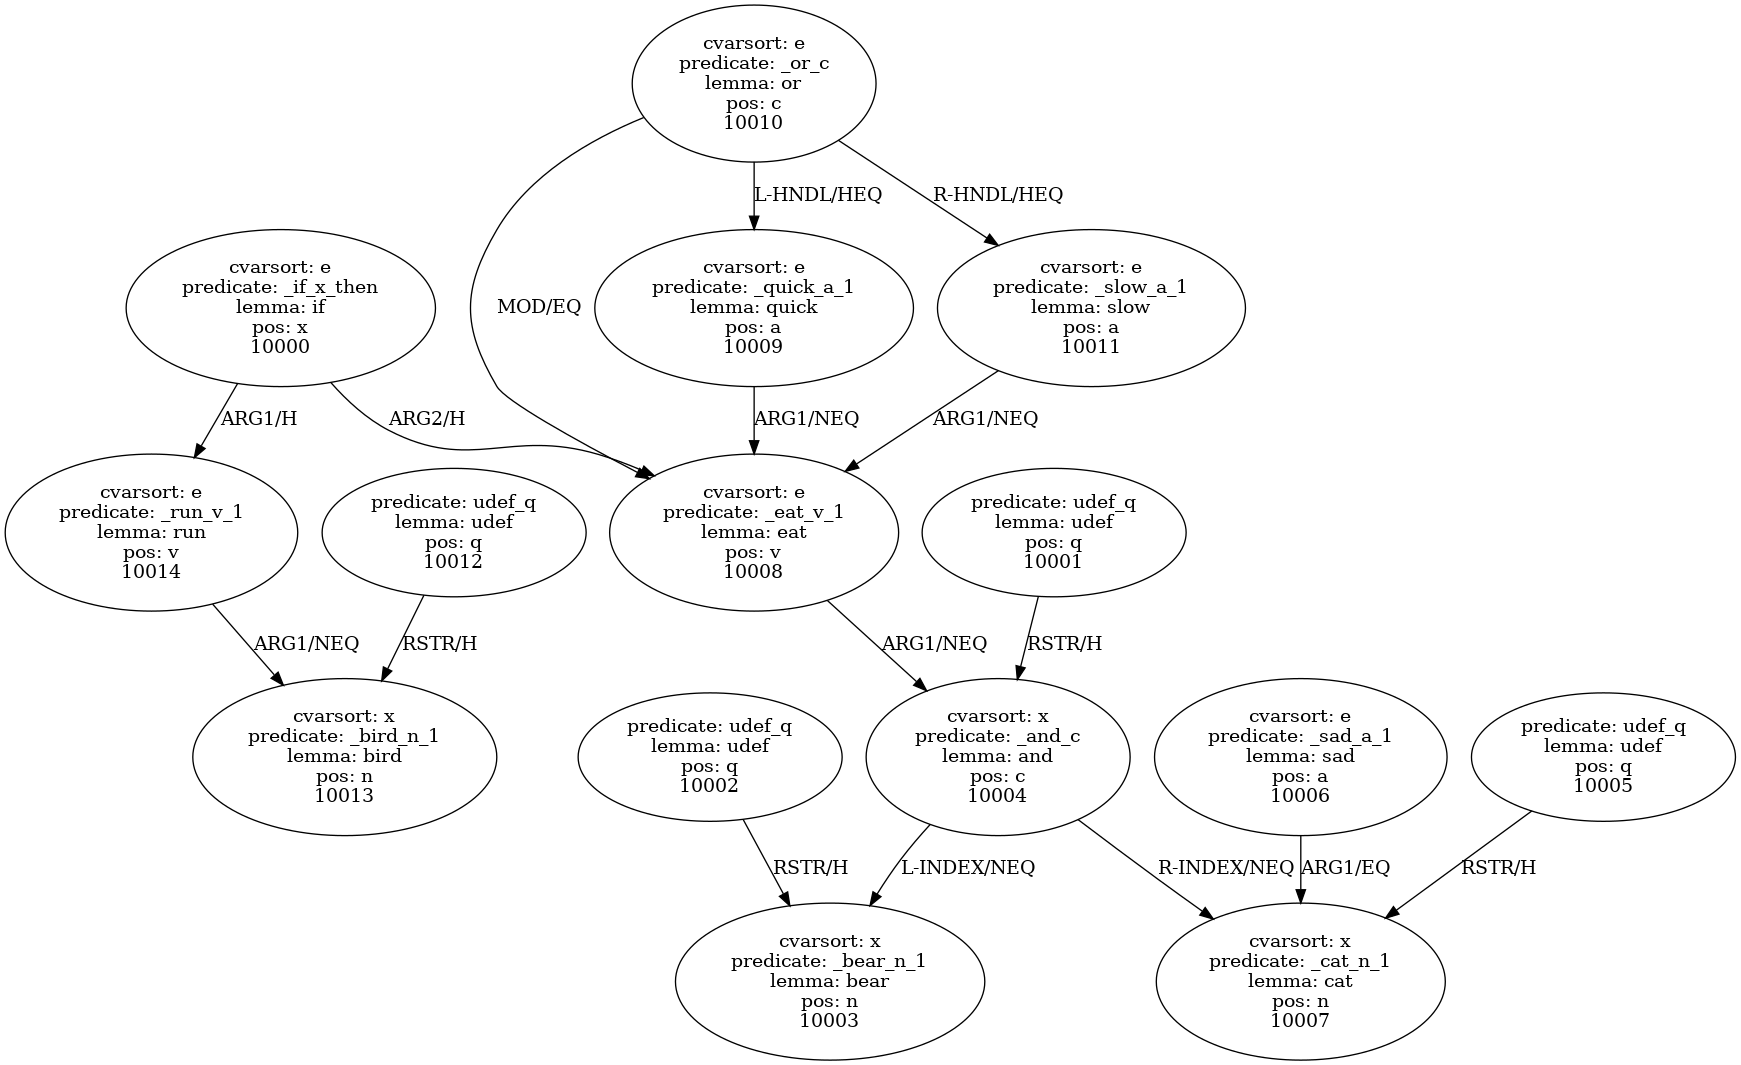

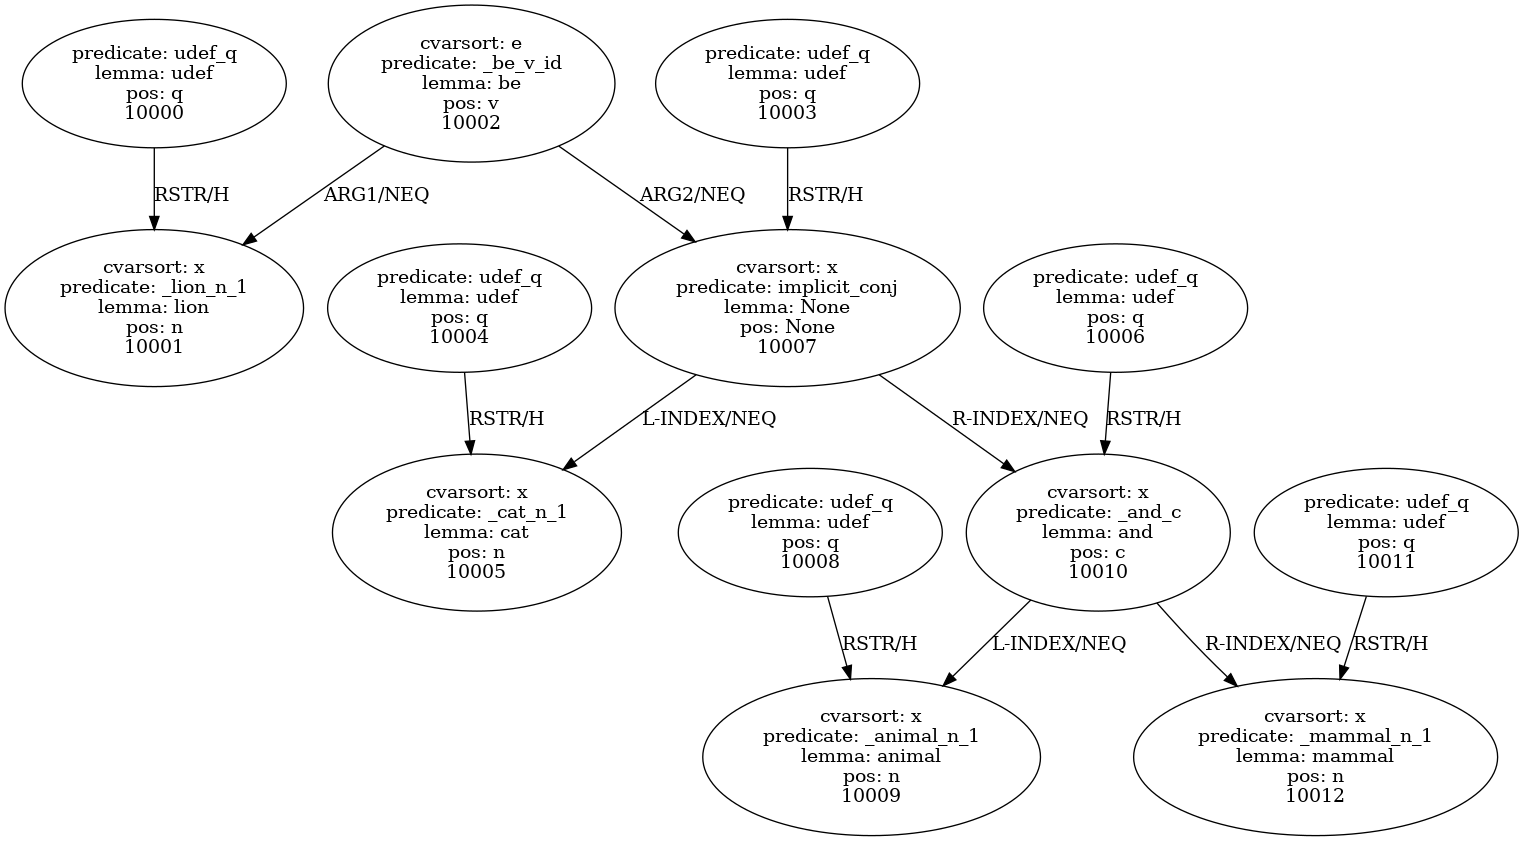

In [4]:
!python generate_dummy_data.py
no_dummy_dmrs = 2 #29
dmrs_save_paths = ['./data/dummy_data/figures/dmrs_{}.png'.format(i) for i in range(no_dummy_dmrs)]
images = []
for i in range(no_dummy_dmrs):
    images.append(Image(filename=dmrs_save_paths[i]))
display(*images)

## Try preparing training info on Dummy Data

If bears and sad cats eat quickly or slowly, birds run.
logic expression tree drawn: data/dummy_data/figures/logic_expr_0.png
dmrs drawn: data/dummy_data/figures/dmrs_0.png
Lions are cats, animals and mammals
logic expression tree drawn: data/dummy_data/figures/logic_expr_1.png
dmrs drawn: data/dummy_data/figures/dmrs_1.png
Pool ended. Reducing ...
saving pred2ix of 8 predicates ...
saving predarg2ix of 8 predicates ...
prepared transformed data info saved at: data/dummy_data/transformed/TCS_f0-lgF-PAS-Gen_dummy/info
retransforming the data given the min. freq. ...
Pool ended. Reducing ...
all logical expressions are translated.
balancing the splits ...
loading data/dummy_data/transformed/TCS_f0-lgF-PAS-Gen_dummy/_transformed_0.json
Finished loading data/dummy_data/transformed/TCS_f0-lgF-PAS-Gen_dummy/_transformed_0.json
Extending 0
total num_instance 1
num_instance_per_file 1
0 1
Saving 0
balanced transformed data saved at: data/dummy_data/transformed/TCS_f0-lgF-PAS-Gen_dummy


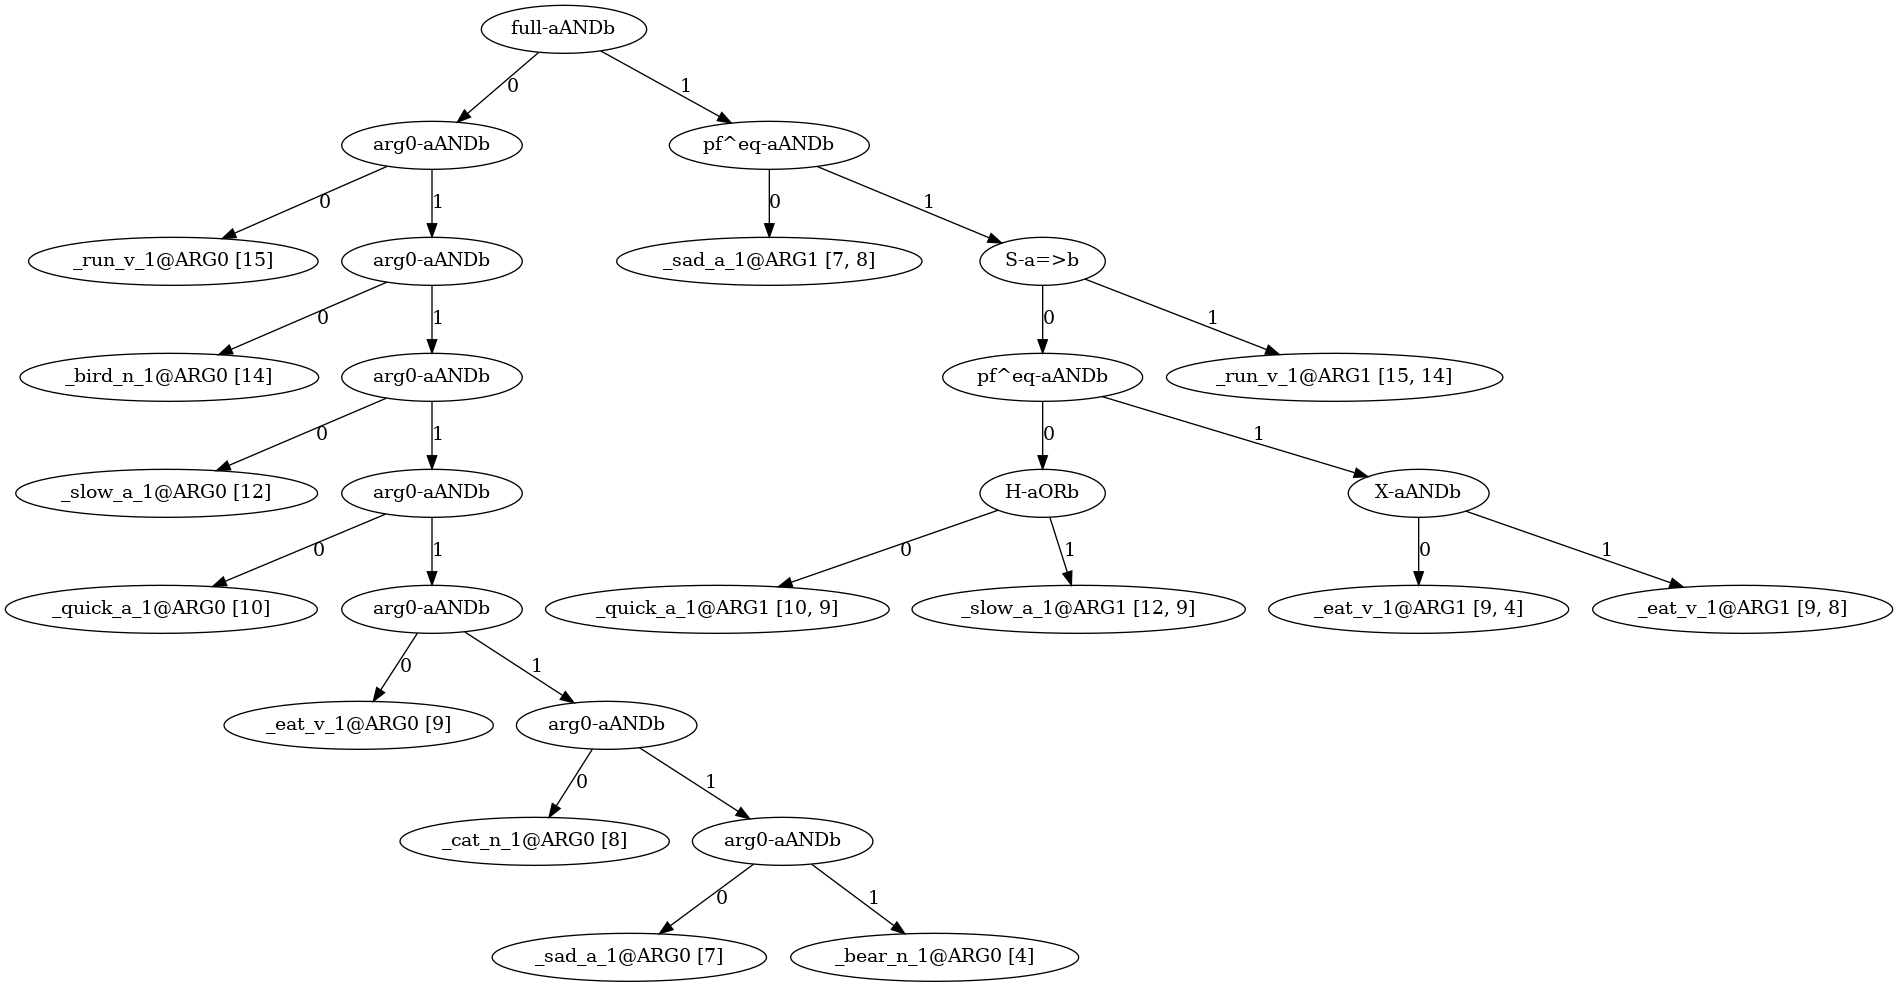

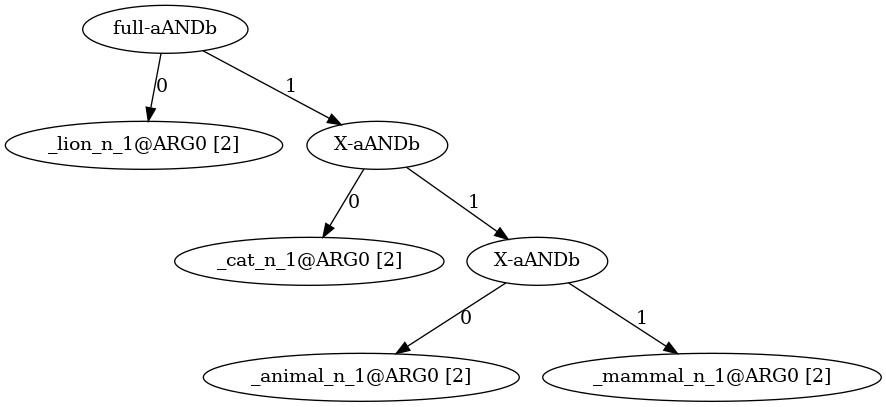

In [5]:
!python prepare_train.py \
    -c configs/config_f0-n32-e300-d300-p0.5-lgF-PAS-Id-l20-GenCon-avgF-a0-spT-alphaNone-startBeta0.01-endBeta0.01at1-vT-stdNormF-g128-elr0.001-dlr0.001-sfT_dummy.json -t yes

logic_expr_save_paths = ['./data/dummy_data/figures/logic_expr_{}.png'.format(i) for i in range(no_dummy_dmrs)]
images = []
for i in range(no_dummy_dmrs):
    images.append(Image(filename=logic_expr_save_paths[i]))
display(*images)

# Training on sample data

## Prepare Evaluation data

In [15]:
!python prepare_eval.py \
    -c configs/config_f0-n32-e300-d300-p0.5-lgF-PAS-Id-l20-GenCon-avgF-a0-spT-alphaNone-startBeta0.01-endBeta0.01at1-vT-stdNormF-g128-elr0.001-dlr0.001-sfT_sample.json -a eval_data_sets -e eval_data

RELPRON-dev has 65, 518 terms, props
RELPRON-test has 73, 569 terms, props
Finally, RELPRON-dev has 65, 341, 16027 terms, props, instances
Finally, RELPRON-test has 73, 305, 17080 terms, props, instances
GS2011 iaa_sep: 0.5780741537674307; iaa_avg: 0.7387408696819319
GS2011 has 199 instances
after filtering OOV: GS2011 has 85 SVO instances
GS2013 iaa_sep: 0.5870766233627992; iaa_avg: 0.7773936738225761
GS2013 has 199 instances
after filtering OOV: GS2013 has 85 SVO instances
GS2012 iaa_sep: 0.45860306755529806; iaa_avg: 0.6867682454198015
GS2012 has 194 instances
after filtering OOV: GS2012 has 77 ASVAO instances


## Prepare Training data

In [8]:
!python prepare_train.py --config configs/config_f0-n32-e300-d300-p0.5-lgF-PAS-Id-l20-GenCon-avgF-a0-spT-alphaNone-startBeta0.01-endBeta0.01at1-vT-stdNormF-g128-elr0.001-dlr0.001-sfT_sample.json --draw_tree no

Pool ended. Reducing ...
saving pred2ix of 12188 predicates ...
saving predarg2ix of 12188 predicates ...
prepared transformed data info saved at: data/27092022/transformed/TCS_f0-lgF-PAS-Gen_sample/info
retransforming the data given the min. freq. ...
Pool ended. Reducing ...
all logical expressions are translated.
balancing the splits ...
loading data/27092022/transformed/TCS_f0-lgF-PAS-Gen_sample/_transformed_2.json
loading data/27092022/transformed/TCS_f0-lgF-PAS-Gen_sample/_transformed_0.json
loading data/27092022/transformed/TCS_f0-lgF-PAS-Gen_sample/_transformed_1.json
loading data/27092022/transformed/TCS_f0-lgF-PAS-Gen_sample/_transformed_4.json
loading data/27092022/transformed/TCS_f0-lgF-PAS-Gen_sample/_transformed_3.json
loading data/27092022/transformed/TCS_f0-lgF-PAS-Gen_sample/_transformed_6.json
loading data/27092022/transformed/TCS_f0-lgF-PAS-Gen_sample/_transformed_7.json
loading data/27092022/transformed/TCS_f0-lgF-PAS-Gen_sample/_transformed_8.jsonloading data/27092

## Training

In [ ]:
!python train.py -c configs/config_f0-n32-e300-d300-p0.5-lgF-PAS-Id-l20-GenCon-avgF-a0-spT-alphaNone-startBeta0.01-endBeta0.01at1-vT-stdNormF-g128-elr0.001-dlr0.001-sfT_sample.json -s 29

# Training on all data

## Prepare Evaluation data

In [ ]:
!python prepare_eval.py -c configs/config_f100-n32-e300-d300-p0.5-lgF-PAS-Id-l20-GenCon-avgF-a0-spT-alphaNone-startBeta0.01-endBeta0.01at1-vT-stdNormF-g128-elr0.001-dlr0.001-sfT.json -a eval_data_sets -e eval_data

RELPRON-dev has 65, 518 terms, props
RELPRON-test has 73, 569 terms, props
Finally, RELPRON-dev has 65, 518, 33670 terms, props, instances
Finally, RELPRON-test has 73, 569, 41537 terms, props, instances
GS2011 iaa_sep: 0.5780741537674307; iaa_avg: 0.7387408696819319
GS2011 has 199 instances
after filtering OOV: GS2011 has 100 SVO instances
GS2013 iaa_sep: 0.5870766233627992; iaa_avg: 0.7773936738225761
GS2013 has 199 instances
after filtering OOV: GS2013 has 100 SVO instances
GS2012 iaa_sep: 0.45860306755529806; iaa_avg: 0.6867682454198015
GS2012 has 194 instances
after filtering OOV: GS2012 has 97 ASVAO instances


## Prepare Training data
* This takes a long time. You may want to run this command in the terminal.

In [ ]:
!python prepare_train.py --config configs/config_f100-n32-e300-d300-p0.5-lgF-PAS-Id-l20-GenCon-avgF-a0-spT-alphaNone-startBeta0.01-endBeta0.01at1-vT-stdNormF-g128-elr0.001-dlr0.001-sfT.json --draw_tree no

## Training
* This takes a long time. You may want to run this command in the terminal.

In [ ]:
!python train.py \
    -c configs/config_f100-n32-e300-d300-p0.5-lgF-PAS-Id-l20-GenCon-avgF-a0-spT-alphaNone-startBeta0.01-endBeta0.01at1-vT-stdNormF-g128-elr0.001-dlr0.001-sfT.json \
    -seed 29

# Post-training

## Ensembling

In [ ]:
# ensembling by re-running model inference; "-b [dir to eval data sets]" to run also baseline for a significance test
!python post_evaluate.py\
    -c configs/config_f100-n32-e300-d300-p0.5-lgF-PAS-Id-l20-GenCon-avgF-a0-spT-alphaNone-startBeta0.01-endBeta0.01at1-vT-stdNormF-g128-elr0.001-dlr0.001-sfT.json \
    -p saved/models/TCS_f100-n32-e300-d300-p0.5-lgF-PAS-Id-l20-GenCon-avgF-a0-spT-alphaNone-startBeta0.01-endBeta0.01at1-vT-stdNormF-g128-elr0.001-dlr0.001-sfT-seed29/checkpoint-epoch4-batch51.pth \
    -p saved/models/TCS_f100-n32-e300-d300-p0.5-lgF-PAS-Id-l20-GenCon-avgF-a0-spT-alphaNone-startBeta0.01-endBeta0.01at1-vT-stdNormF-g128-elr0.001-dlr0.001-sfT-seed30/checkpoint-epoch4-batch61.pth \
    -b eval_data_sets

In [ ]:
# ensembling by reading outputs of models
!python post_evaluate.py\
    -c configs/config_f100-n32-e300-d300-p0.5-lgF-PAS-Tanh-l20-GenCon-avgF-a0-spT-alphaNone-startBeta0.0-endBeta0.0at1-vT-stdNormF-g128-elr0.001-dlr0.001-sfT.json \
    -o results/TCS_f100-n32-e300-d300-p0.5-lgF-PAS-Id-l20-GenCon-avgF-a0-spT-alphaNone-startBeta0.01-endBeta0.01at1-vT-stdNormF-g128-elr0.001-dlr0.001-sfT-seed29/epoch4_51 \
    -o results/TCS_f100-n32-e300-d300-p0.5-lgF-PAS-Id-l20-GenCon-avgF-a0-spT-alphaNone-startBeta0.01-endBeta0.01at1-vT-stdNormF-g128-elr0.001-dlr0.001-sfT-seed30/epoch4_61


# Query Sentences by ID

In [2]:
# check raw data
from src import util
from pprint import pprint
import json
snt_ids = ["1000060400020", "1000060700020", "1000060100020", "1000060200020", "1000060300020", "1000060500020"]
snt_ids = ["1000150800040"] #1000140000010
data_dir = "data/27092022"
files = [file for file in os.listdir(data_dir) if all([
    os.path.isfile(os.path.join(data_dir, file)),
    # file.startswith("{}_".format(str(worker_id))),
    util.is_data_json(file)
    ])
]
for file in files:
    with open(os.path.join(data_dir, file)) as f:
        idx2instance = json.load(f)
    snt_ids_copy = snt_ids.copy()
    for snt_id in snt_ids:
        if snt_id in idx2instance:
            pprint (idx2instance[snt_id]['snt'])
            snt_ids_copy.remove(snt_id)
        # for idx, instance in idx2instance.items():
        # # 528 identical sentences
        #     if instance['snt'] == "It features ⌊>superscript>⌋ or ⌊>subscript>⌋ characters that are substituted or omitted because of ⌊>technical limitations>⌋.":
        #         print (instance['id'])
    snt_ids = snt_ids_copy
    if snt_ids == []:
        break


('Its registrars are not only individuals, businesses and organizations in the '
 'Philippines, but also those in other parts of the world.')
